In [1]:
import pandas as pd

def extract(csv_file):
    """Extract data from CSV file"""
    print(f"Extracting data from {csv_file}")
    return pd.read_csv(csv_file)

def transform(df):
    """Transform the data"""
    print("Transforming data")
    
    time_cols = ['time', 'sunrise', 'sunset']
    for col in time_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col])
    
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_cols] = df[numeric_cols].fillna(0)
    
    string_cols = df.select_dtypes(include=['object']).columns
    df[string_cols] = df[string_cols].astype(str)
    
    return df

In [2]:
df = extract("lk_weather_data.csv")
df = transform(df)


Extracting data from lk_weather_data.csv
Transforming data


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

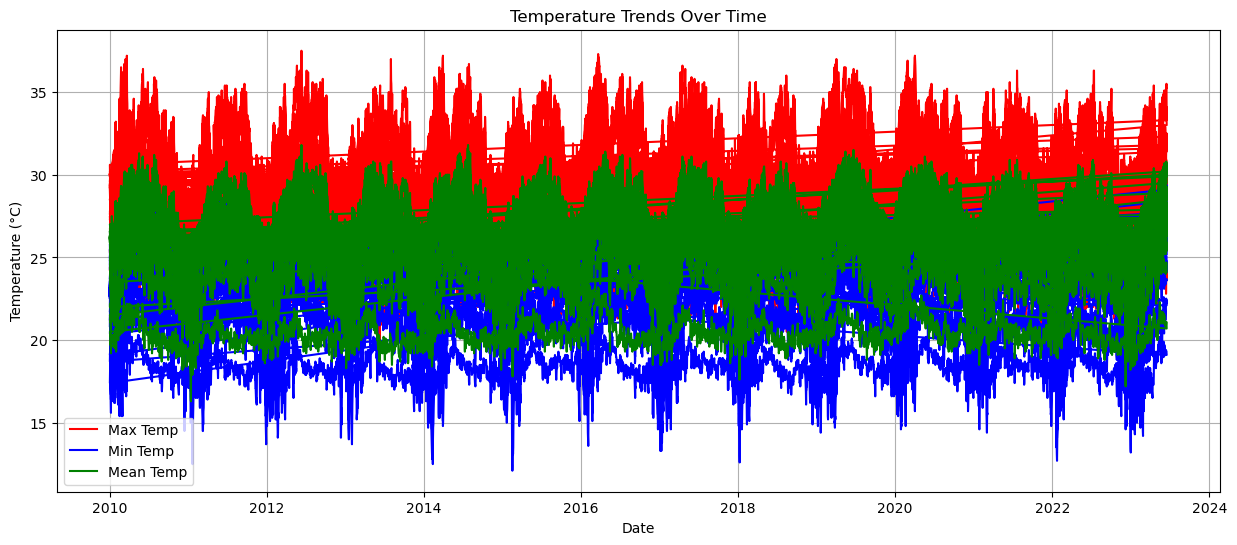

In [11]:
def plot_temperature_trends(df):
    plt.figure(figsize=(15, 6))
    plt.plot(df['time'], df['temperature_2m_max'], label='Max Temp', color='red')
    plt.plot(df['time'], df['temperature_2m_min'], label='Min Temp', color='blue')
    plt.plot(df['time'], df['temperature_2m_mean'], label='Mean Temp', color='green')
    plt.title('Temperature Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_temperature_trends(df)

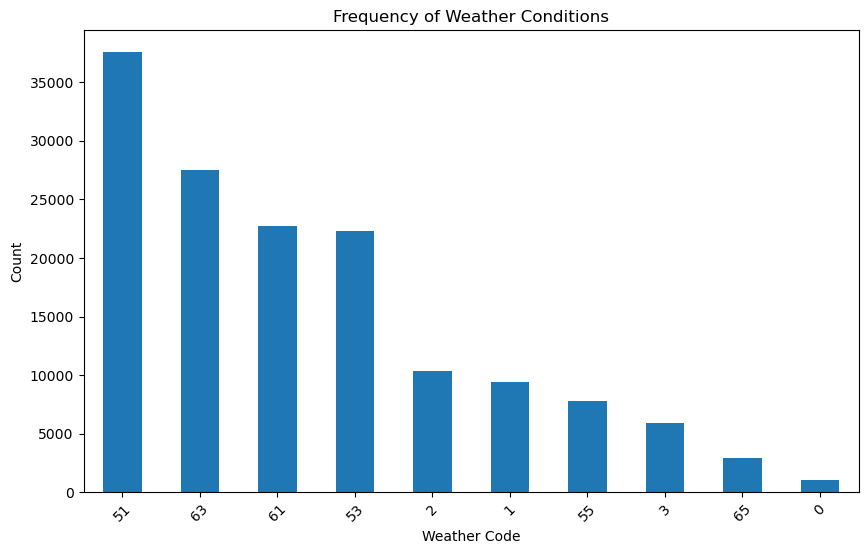

In [13]:
def plot_weather_conditions(df):
    # Group by weather code (you'll need to map codes to descriptions)
    weather_counts = df['weathercode'].value_counts()
    
    plt.figure(figsize=(10, 6))
    weather_counts.plot(kind='bar')
    plt.title('Frequency of Weather Conditions')
    plt.xlabel('Weather Code')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
plot_weather_conditions(df)

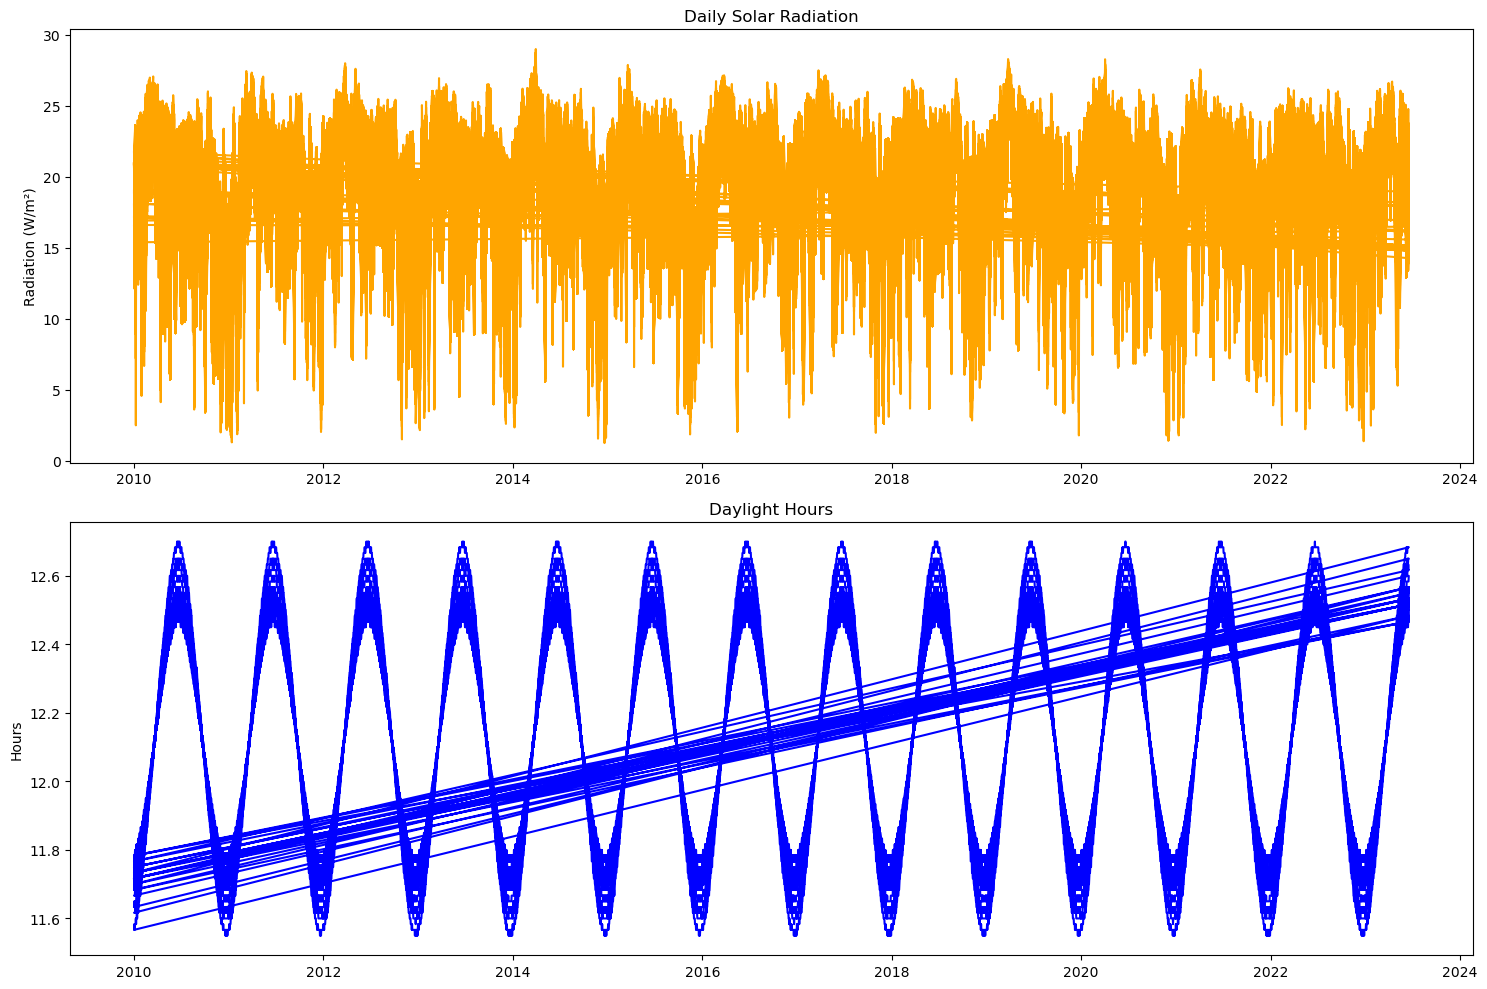

In [15]:
def plot_solar_data(df):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    
    # Radiation plot
    ax1.plot(df['time'], df['shortwave_radiation_sum'], color='orange')
    ax1.set_title('Daily Solar Radiation')
    ax1.set_ylabel('Radiation (W/m²)')
    
    # Daylight duration
    df['daylight_hours'] = (df['sunset'] - df['sunrise']).dt.total_seconds() / 3600
    ax2.plot(df['time'], df['daylight_hours'], color='blue')
    ax2.set_title('Daylight Hours')
    ax2.set_ylabel('Hours')
    
    plt.tight_layout()
    plt.show()
plot_solar_data(df)

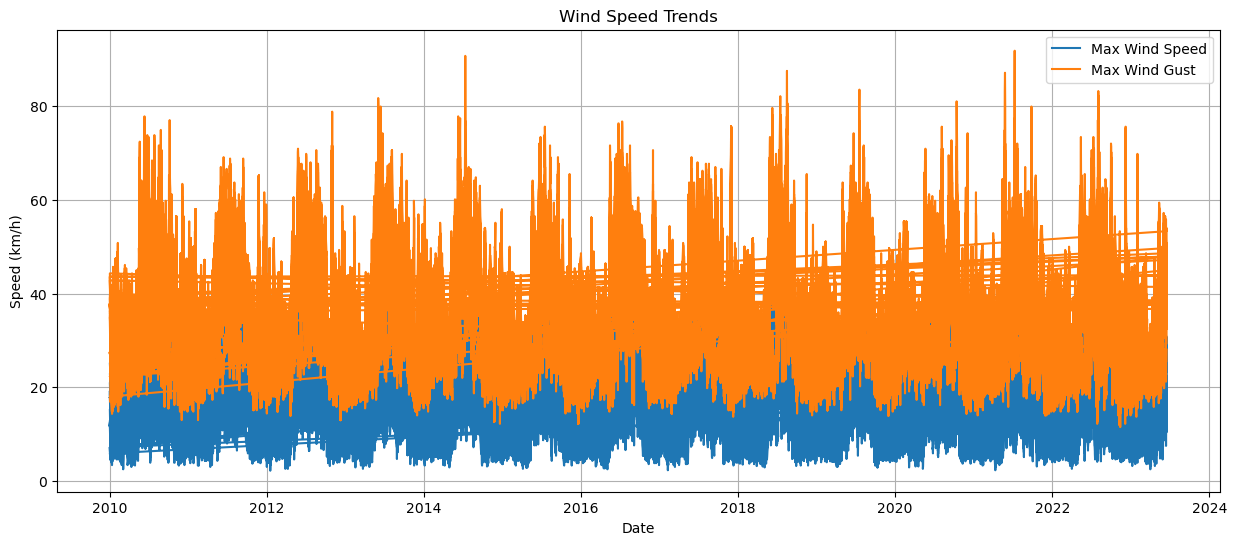

In [17]:
def plot_wind_data(df):
    plt.figure(figsize=(15, 6))
    plt.plot(df['time'], df['windspeed_10m_max'], label='Max Wind Speed')
    plt.plot(df['time'], df['windgusts_10m_max'], label='Max Wind Gust')
    plt.title('Wind Speed Trends')
    plt.xlabel('Date')
    plt.ylabel('Speed (km/h)')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_wind_data(df)

KeyboardInterrupt: 

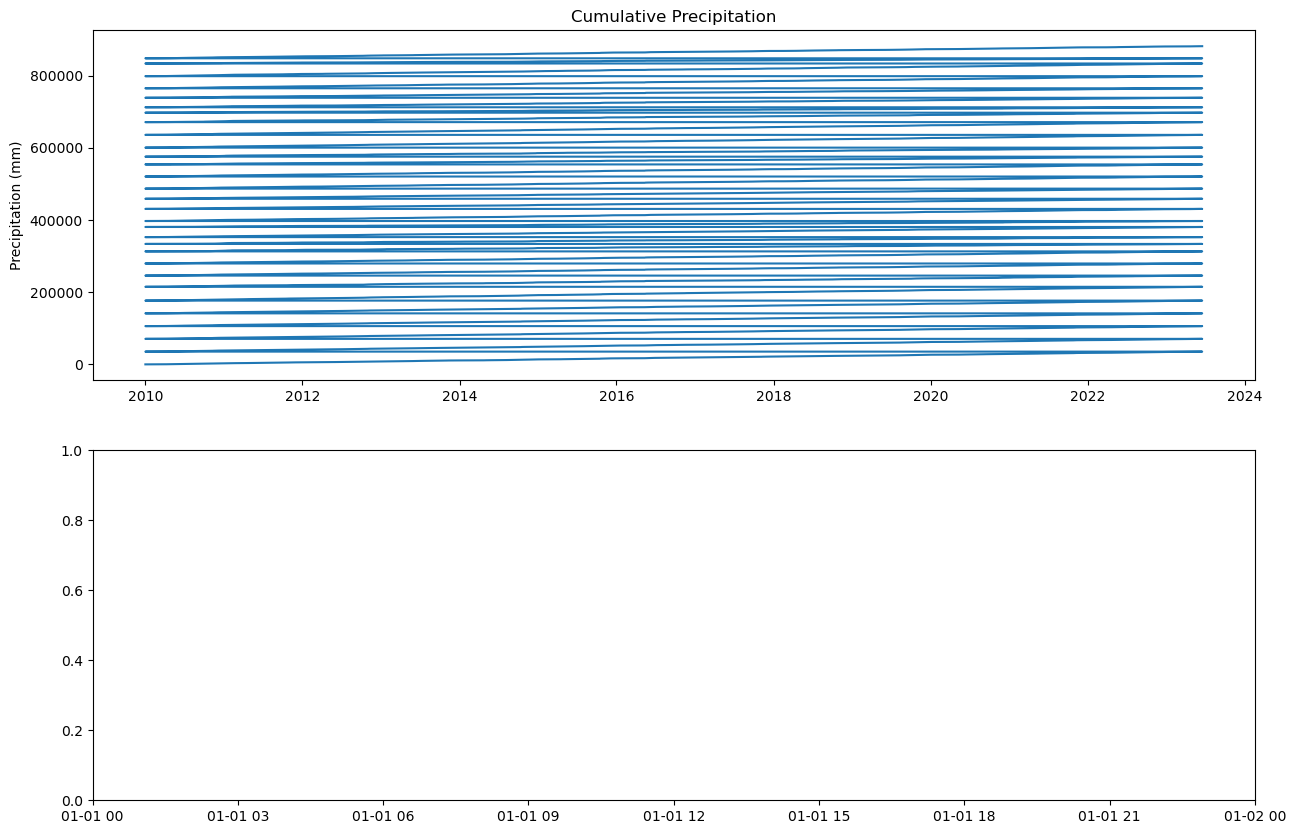

In [4]:
def plot_precipitation(df):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    
    # Cumulative precipitation
    df['cumulative_precip'] = df['precipitation_sum'].cumsum()
    ax1.plot(df['time'], df['cumulative_precip'])
    ax1.set_title('Cumulative Precipitation')
    ax1.set_ylabel('Precipitation (mm)')
    
    # Rain vs snow
    ax2.bar(df['time'], df['rain_sum'], label='Rain', width=1, color='blue')
    ax2.bar(df['time'], df['snowfall_sum'], bottom=df['rain_sum'], label='Snow', width=1, color='gray')
    ax2.set_title('Rain vs Snowfall')
    ax2.set_ylabel('Amount (mm)')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
plot_precipitation(df)

In [ ]:
def plot_geo_data(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['longitude'], df['latitude'], c=df['temperature_2m_mean'], 
                cmap='coolwarm', s=100)
    plt.colorbar(label='Mean Temperature (°C)')
    plt.title('Temperature by Location')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
plot_geo_data(df)

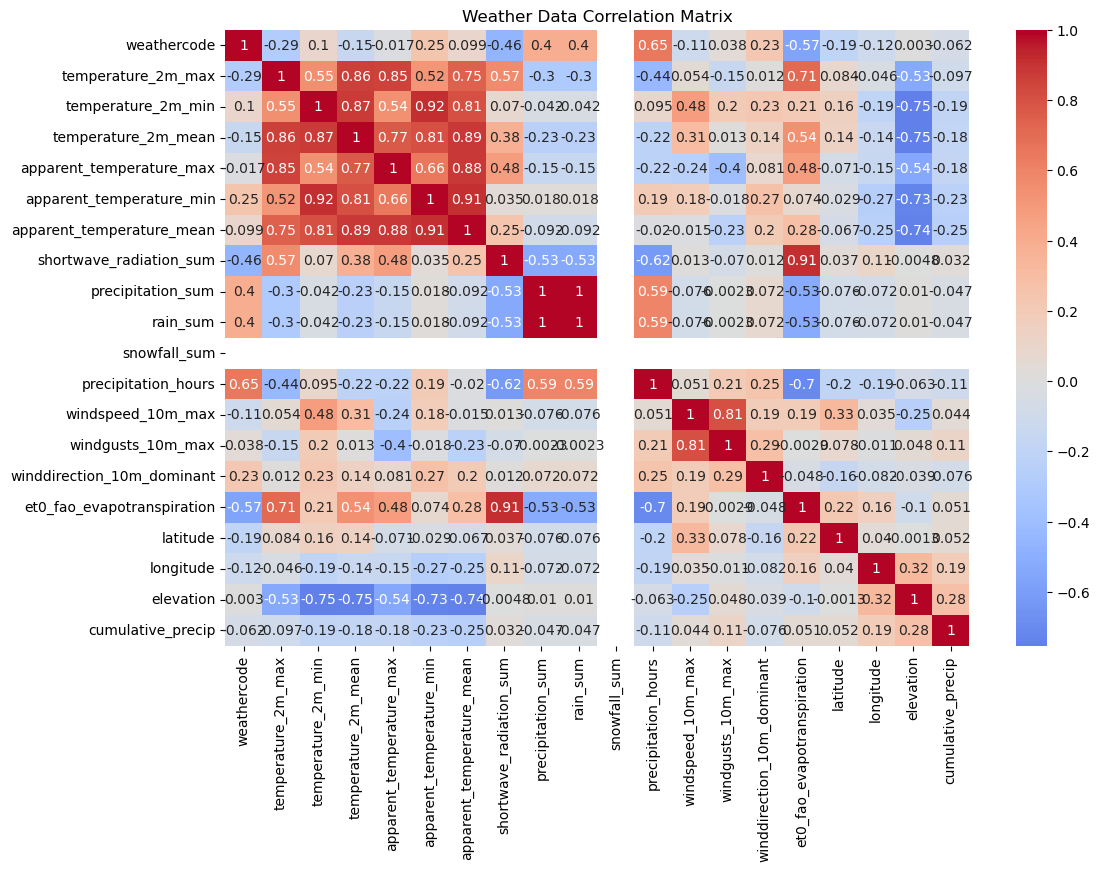

In [5]:
def plot_correlation(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(12, 8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Weather Data Correlation Matrix')
    plt.show()
plot_correlation(df)

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose


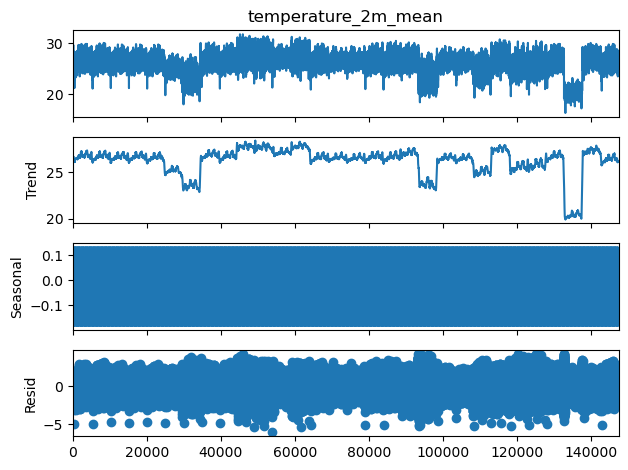

In [7]:
def seasonal_decomposition(df, column='temperature_2m_mean', period=365):
    result = seasonal_decompose(df[column], model='additive', period=period)
    result.plot()
    plt.show()
seasonal_decomposition(df)